## Final Project Submission

* Student name: Kevin Spring
* Student pace: Flex
* Scheduled project review date/time: August 8, 2022 13:30 - 14:15 (CDT)
* Instructor name: Morgan Jones
* Blog post URL: https://medium.com/@kevinjspring/predicting-home-sale-prices-using-linear-regression-4ebf079a48e8

# Summary
- Our client wants to be able to predict sales price.
- Ordinary least squares linear regression was used to create three models.
- The three models were compared using $R^2$, Prediction Intervals (PI), and Root Mean Squared Error (RMSE).
- Model 2 (M2) is the best model as it has the best predictive capabilities, R-squared 0.88, low RMSE and PI.
- M2 could be used to prototype a client dashboard for real estate agents to predict sales price for new data.
- More data and variables should be collected to improve the model's predictive power.
- Communicate with client about internal real estate data that can be used to further train the model.

# Actionable Recommendations
1. M2 could be used for a client dashboard prototype for Bon Jovi real estate agents to predict sales price.
2. M2 can be used to measure the cost-benefit analysis of making improvements to the home. For example, a one-unit increase in the condition of the home will increase the sale price by about 5%. 
3. M2 can help Bon Jovi real estate agents locate customers and properties that have the highest sale price potential. For example, homes in Zipcode 98039 sold for over 200% more than homes in Zipcode 98003 so those customers in 98039 likely have a higher sales price.

# Table of Contents

- [Business Problem](#Business-Problem)
- [Stakeholders](#Stakeholders)
- [Methods Summary](#Methods-Summary)
- [Data](#Data)
- [Data Cleanup](#Data-Cleanup)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Model Specification](#Model-Specification)
- [Modeling and Regression Results](#Modeling-and-Regression-Results)
- [Conclusions](#Conclusions)
    - [Model Analysis and Comparisons](#Model-Analysis-and-Comparisons)
    - [Prediction Application](#Prediction-Application)
- [Recommendations](#Recommendations)
- [References](#References)



# Business Problem
Our client is a residential real estate broker in King County, WA interested in finding a solution for their customers. Many of their customers come to them needing to sell their home but are unsure of the market value of their home. The client wants us to design and implement a model where they can take in the features of a seller's home and determine which price to begin listing discussion.

# Stakeholders
- President of brokerage firm
- Real estate agents that will use the dashboard

# Methods Summary

Our client wants us to predict a continuous value, sales price, from features of the house their customer gives them in the form of continuous and catagorical data. Regression analysis is a statistical process to estimate the relationship between a dependent variable (response) and a continuous independent variables (predictors). 

In this analysis I will use ordinary least squares (OLS) linear regresion to assess the relationship between features of homes for sale price. OLS minimizes the sum of the squared difference between the observed dependent variable and the predicted response ($\hat{y}$)

$$\text{To calculate } \hat{y}\text{,}$$ 

$$\hat{y} = \hat{\beta}_{0} + \sum \limits _{i=1} ^{n}x_{n}\hat{\beta}_{n}$$

where $n$ is the number of predictors, $\beta_0$ is the intercept, $\hat{x}_{n}$ is the $n^{th}$ predictor, and $\hat y$ are the predicted value associated with the dependent variables. 

The linear equation that is returned can be used to predict the response value using new data. 

To perform OLS linear regression the data needs to be clean with no missing values and catagorical data needs to be coded correctly. The assumptions of OLS linear regression are checked and models are built. These models are compared using, coefficient of determination, prediction intervals, and Root Mean Squared Error to compare and determine wich model is the most suited for our client.

In [1]:
# Import libraries
from datetime import date

## Data analysis
import pandas as pd
import numpy as np

## Statistical analysis
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf  
from statsmodels.formula.api import ols
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import train_test_split

## Model Validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import data
df = pd.read_csv('data/kc_house_data.csv')

# Data

## Description

The data is a collection of single family homes in the King County, WA area sold between May 2014 and May 2015 ([1](#References)). The data contains 21 variables and 21,597 records. This data will be suitable to create a model to predict sale price for homes within the paramaters of this dataset.

In [2]:
df.shape

(21597, 21)

In [3]:
#inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Variable Names and Descriptions for King County Data Set

See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code

| Variable | Data Type | Description |
|:---------|:----------|:------------|
|`id`| catagorical | Unique identifier for a house |
|`date`|continuous | Date house was sold |
| `price` | continuous | Sale price (prediction target)
| `bedrooms` | discrete | Number of bedrooms
| `bathrooms` | discrete | Number of bathrooms
| `sqft_living` | continuous | Square footage of living space in the home
| `sqft_lot` | continuous | Square footage of the lot
| `floors` - | discrete | Number of floors (levels) in house
| `waterfront` | ordinal | Whether the house is on a waterfront |
| `view` | ordinal | Quality of view from house |
| `condition` | ordinal | How good the overall condition of the house is. Related to maintenance of house |
| `grade` | ordinal | Overall grade of the house. Related to the construction and design of the house |
| `sqft_above` | continuous | Square footage of house apart from basement |
| `sqft_basement` | continuous | Square footage of the basement |
| `yr_built` | catagorical | Year when house was built |
| `yr_renovated` | catagorical |Year when house was renovated |
| `zipcode` | catagorical | ZIP Code used by the United States Postal Service |
| `lat` | catagorical | Latitude coordinate |
| `long` | catagorical | Longitude coordinate |
| `sqft_living15` | continuous | The square footage of interior housing living space for the nearest 15 neighbors |
| `sqft_lot15` | continuous | The square footage of the land lots of the nearest 15 neighbors | 


## Location of King County, WA home sales

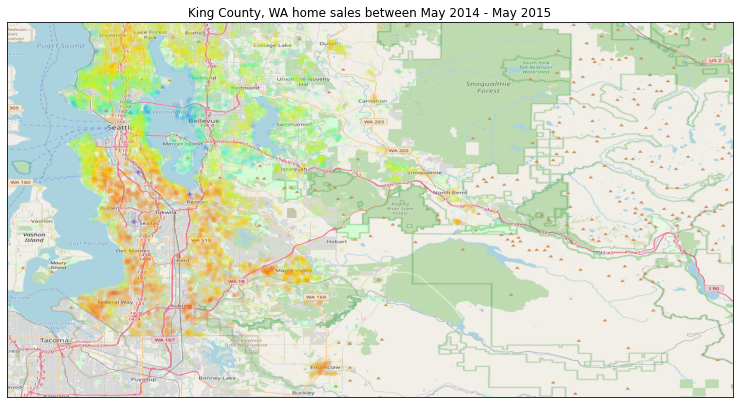

In [4]:
## Map of home sales between May 2014 and May 2015
# code adapted from 
# Ahmed Qassim, 
# https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

# Define bounding box
BBox = ((df.long.min(), df.long.max(), 
         df.lat.min(), df.lat.max() ))

# Make scatterplot
fig, ax  = plt.subplots(figsize = (13,12))
ax.scatter(df.long, df.lat, c = np.log(df.price), alpha=.075, s=20, edgecolors='none',
           cmap= plt.cm.get_cmap('jet_r'))
# Plot paramaters
ax.set_title('King County, WA home sales between May 2014 - May 2015') # title
ax.tick_params(axis='both', which='both',                        # Remove x, y ticks and labels
               bottom=False, top=False, left=False, right=False,
               labelbottom=False, labeltop=False, labelleft=False, labelright=False)

# Set x and y-axis limits to bounding box
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

# Set area map
ruh_m=plt.imread('img/King_County_map.png')
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal') #

# plt.savefig('img/KC_home_sale_map.png', dpi=600) # save the image


## Data Limitations
- Data is only from 2014 to 2015. Models to predict future sales price would need to be updated with newer data.
- Some data might be missing, such as for-sale-by-owner or owner-financed sales.
- Ordinal data might be highly variable based on examinter's subjective experience.

# Data Cleanup
## Identify and remove duplicated records

In [5]:
# Any dulplicated homes?
duplicates_len = len(df[df.duplicated(subset=['id'], keep=False)].sort_values(by='id'))

print(f"Results:\nThere are {duplicates_len} duplicated records.")
df[df.duplicated(subset=['id'], keep=False)].sort_values(by='id').head(4)

Results:
There are 353 duplicated records.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.0,2400,9373,2.0,NO,NONE,...,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.0,2400,9373,2.0,NaN,NONE,...,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.0,840,12750,1.0,NO,NONE,...,6 Low Average,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.0,840,12750,1.0,NO,NONE,...,6 Low Average,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969


### Duplicate home ID discussion
The duplicated records based on ID  are from the same homes that sold within the same year. These homes have the same attributes except for sale `date`. These may be homes that were flipped or sold quickly after an initial sale. I will keep these records as I am interested in predicting a home's sale price and these give more data for the true value of a house.

## Remove Unnecessary variables
The following variables will be deleted from this analysis as they are unnecessary to my analysis.
- `id` - This is an unique identifier for each home. Too unique.
- `date` - This is the sale date and time will not be analyzed due to the single year of the data.
- `lat` - This is the latitude of the home sold. Will use Zipcode for location.
- `long` - same reasoning as `lat`

In [6]:
# delete unnecessary columns
df.drop(['id','date', 'lat', 'long'], axis=1, inplace=True)

## Identify Missing data

In [7]:
# How many columns have NaN?
print(df.isna().sum())

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [8]:
# Any placeholders?
# Look for top occuring values
print('King County, WA \n Home Sales Dataframe\n')
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize = True).head(10), '\n')

King County, WA 
 Home Sales Dataframe

price 
 450000.0    0.007964
350000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
325000.0    0.006853
400000.0    0.006714
375000.0    0.006390
300000.0    0.006158
525000.0    0.006066
Name: price, dtype: float64 

bedrooms 
 3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9     0.000278
10    0.000139
Name: bedrooms, dtype: float64 

bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
1.50    0.066907
2.75    0.054869
3.00    0.034866
3.50    0.033847
3.25    0.027272
Name: bathrooms, dtype: float64 

sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1800    0.005973
1660    0.005973
1010    0.005973
1820    0.005927
1480    0.005788
1720    0.005788
1540    0.005742
Name: sqft_living, dtype: float64 

sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
480

### Missing value results
- `NaN`
    - `waterfront`
        - Binary categorical variable (`YES` or `NO`)
        - replace `NaN` with mode of `NO` as most likely these properties are not waterfront
    - `view`
        - Ordinal categorical variable
        - replace `NaN` with `NONE` 
    - `yr_renovated`
        - Will be converted to a countable numerical variable
        - `0` is the most common value with over 95% of values. 
        - Replace `NaN` with 0 value
- Placeholder
    - `yr_renovated` has `0` for missing or unknown values.
    - `sqft_basement` has `?` for missing or unknown values.

In [9]:
# replacing waterfront NaN with 'NO'
df['waterfront'].fillna('NO', inplace=True)

# replace yr_renovated NaN with 'Unknown'
df['yr_renovated'].fillna(0, inplace=True)

# replace `Nan` with `NONE` for column `view`
df['view'].fillna('NONE', inplace=True)

In [10]:
# Confirm no more NaN values
print(df.isna().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Coding ordinal, binary, and count data

| variable | Data Type | Plan |
|:---------|:----------|:-----|
|`condition`| ordinal | Recode to dictionary.<br>`{'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}` |
|`grade` | ordinal |Delete the descriptor, keep the number, and convert it to `int` datatype.<br>Example: `7 Average` becomes `7` |
|`basement`| binary | If there is a basement (sq.ft > 0) the value will be set to `1`.<br> No basement (sq.ft = 0) set to `0`. <br>`?` makes up about 2% of values and the current value of `0` makes up almost 60%.<br>Replace `?` with the mode of `0`. |
| `view` | oridinal | Recode to dictionary.<br>`{'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}` |
| `waterfront` | binary | Recode to dictionary.<br>`{NO': 0, 'YES': 1}`. |
| `home_age` | discrete | Create variable from `yr_built`.<br>Subtract current year from `yr_built`. <br>Drop `yr_built` |
| `yr_since_reno` | discrete | Create variable from `yr_renovated`.<br>Subtract current year from `yr_renovated`.<br>`0` is the most common value with over 95% of values.<br>If never renovated then subtract from `yr_built`.<br>Drop `yr_renovated`. |

In [11]:
# -------------------------------------------------------------------------#
# Encoding ordinal, binary, and count variables

# Code condition to ordinal data
# Map condition variable to dictionary
condition_dict = {'Poor': 0, 'Fair': 1, 'Average': 2,   # Map
                  'Good': 3, 'Very Good': 4}
df['condition'] = df['condition'].map(condition_dict)   # Use map to 
                                                        # code values

# Code Grade to ordinal data
# Strip out by spaces and keep the first string, which is the value
df['grade'] = df['grade'].apply(lambda x: x.split(' ', 1)[0]).astype(int)

# Code sqft_basement to binary data
# sqft_basement has '?' as a placeholder. Set this to 0.
df['sqft_basement'].replace('?', 0, inplace=True)      
# change to numerical type
df['sqft_basement'] = df['sqft_basement'].astype(float) 
# With a basement then code as 1
df['sqft_basement'].loc[df['sqft_basement'] > 0] = 1 
# rename column
df.rename(columns={'sqft_basement': 'basement'}, inplace=True) 

# Code view to ordinal data
# Map ordinal variable to dictionary
view_dict = {'NONE': 0, 
             'FAIR': 1, 
             'AVERAGE': 2,  
             'GOOD': 3,
             'EXCELLENT': 4} # map
df['view'] = df['view'].map(view_dict) # Recode

# Recode waterfront to binary data
# Map binary variable to dictionary
waterfront_dict = {'NO': 0, 'YES': 1} # map
df['waterfront'] = df['waterfront'].map(waterfront_dict) # Recode

# Recode home_age to discrete data
# Calculate home age
current_year = date.today().year # assign current year
df['home_age'] = current_year - df['yr_built'] # Calculate year since built          
df.drop('yr_built', axis=1, inplace=True) # drop old column

# Recode yr_since_reno to discrete data
# subtraction function
def sub(a, b):
    return a - b
# Calculate years since last renovation
df['yr_since_reno'] = df.apply(lambda row : sub(current_year, row['yr_renovated']) if row['yr_renovated'] > 0 else row['home_age'], axis = 1)
df.drop('yr_renovated', axis=1, inplace=True)


D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) # Data description to identify outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,zipcode,sqft_living15,sqft_lot15,home_age,yr_since_reno
count,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597
mean,540297,3.3732,2.11583,2080.32,15099.4,1.4941,0.0067602,0.233181,2.40983,7.65792,1788.6,0.3851,98078,1986.62,12758.3,51.0003,49.0549
std,367368,0.926299,0.768984,918.106,41412.6,0.539683,0.0819439,0.764673,0.650546,1.1732,827.76,0.48663,53.5131,685.23,27274.4,29.3752,28.9454
min,78000,1,0.5,370,520,1,0,0,0,3,370,0,98001,399,651,7,7
25%,322000,3,1.75,1430,5040,1,0,0,2,7,1190,0,98033,1490,5100,25,23
50%,450000,3,2.25,1910,7618,1.5,0,0,2,7,1560,0,98065,1840,7620,47,45
75%,645000,4,2.5,2550,10685,2,0,0,3,8,2210,1,98118,2360,10083,71,68
max,7.7e+06,33,8,13540,1.65136e+06,3.5,1,4,4,13,9410,1,98199,6210,871200,122,122


## Outliers


There is an outlier that may be due to a data entry mistake. One house has 33 bedrooms. I was expecting it to be a mansion but it has an average grade (7), 1.75 bathrooms, and only 1,620 square feet of living space. I think this house had a miskey and the number of bedrooms should be 3.

In [13]:
df[df['bedrooms'] > 30]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,zipcode,sqft_living15,sqft_lot15,home_age,yr_since_reno
15856,640000.0,33,1.75,1620,6000,1.0,0,0,4,7,1040,1.0,98103,1330,4700,75,75.0


In [14]:
df.at[15856, 'bedrooms'] = 3
df.loc[[15856]]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,zipcode,sqft_living15,sqft_lot15,home_age,yr_since_reno
15856,640000.0,3,1.75,1620,6000,1.0,0,0,4,7,1040,1.0,98103,1330,4700,75,75.0


# Exploratory Data Analysis
## Cleaned Data Description

In [15]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,zipcode,sqft_living15,sqft_lot15,home_age,yr_since_reno
count,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597
mean,540297,3.37181,2.11583,2080.32,15099.4,1.4941,0.0067602,0.233181,2.40983,7.65792,1788.6,0.3851,98078,1986.62,12758.3,51.0003,49.0549
std,367368,0.904096,0.768984,918.106,41412.6,0.539683,0.0819439,0.764673,0.650546,1.1732,827.76,0.48663,53.5131,685.23,27274.4,29.3752,28.9454
min,78000,1,0.5,370,520,1,0,0,0,3,370,0,98001,399,651,7,7
25%,322000,3,1.75,1430,5040,1,0,0,2,7,1190,0,98033,1490,5100,25,23
50%,450000,3,2.25,1910,7618,1.5,0,0,2,7,1560,0,98065,1840,7620,47,45
75%,645000,4,2.5,2550,10685,2,0,0,3,8,2210,1,98118,2360,10083,71,68
max,7.7e+06,11,8,13540,1.65136e+06,3.5,1,4,4,13,9410,1,98199,6210,871200,122,122


## About the data
The median house sold in King County, WA between 2014 to 2015 was for \$450,000. The median house sold was 1910 square feet, 3 bedroom, 2.25 bathrooms, and 47 years old. The home sale price range was \\$78,000 to \\$7,700,000.

## Variable scatter matrix

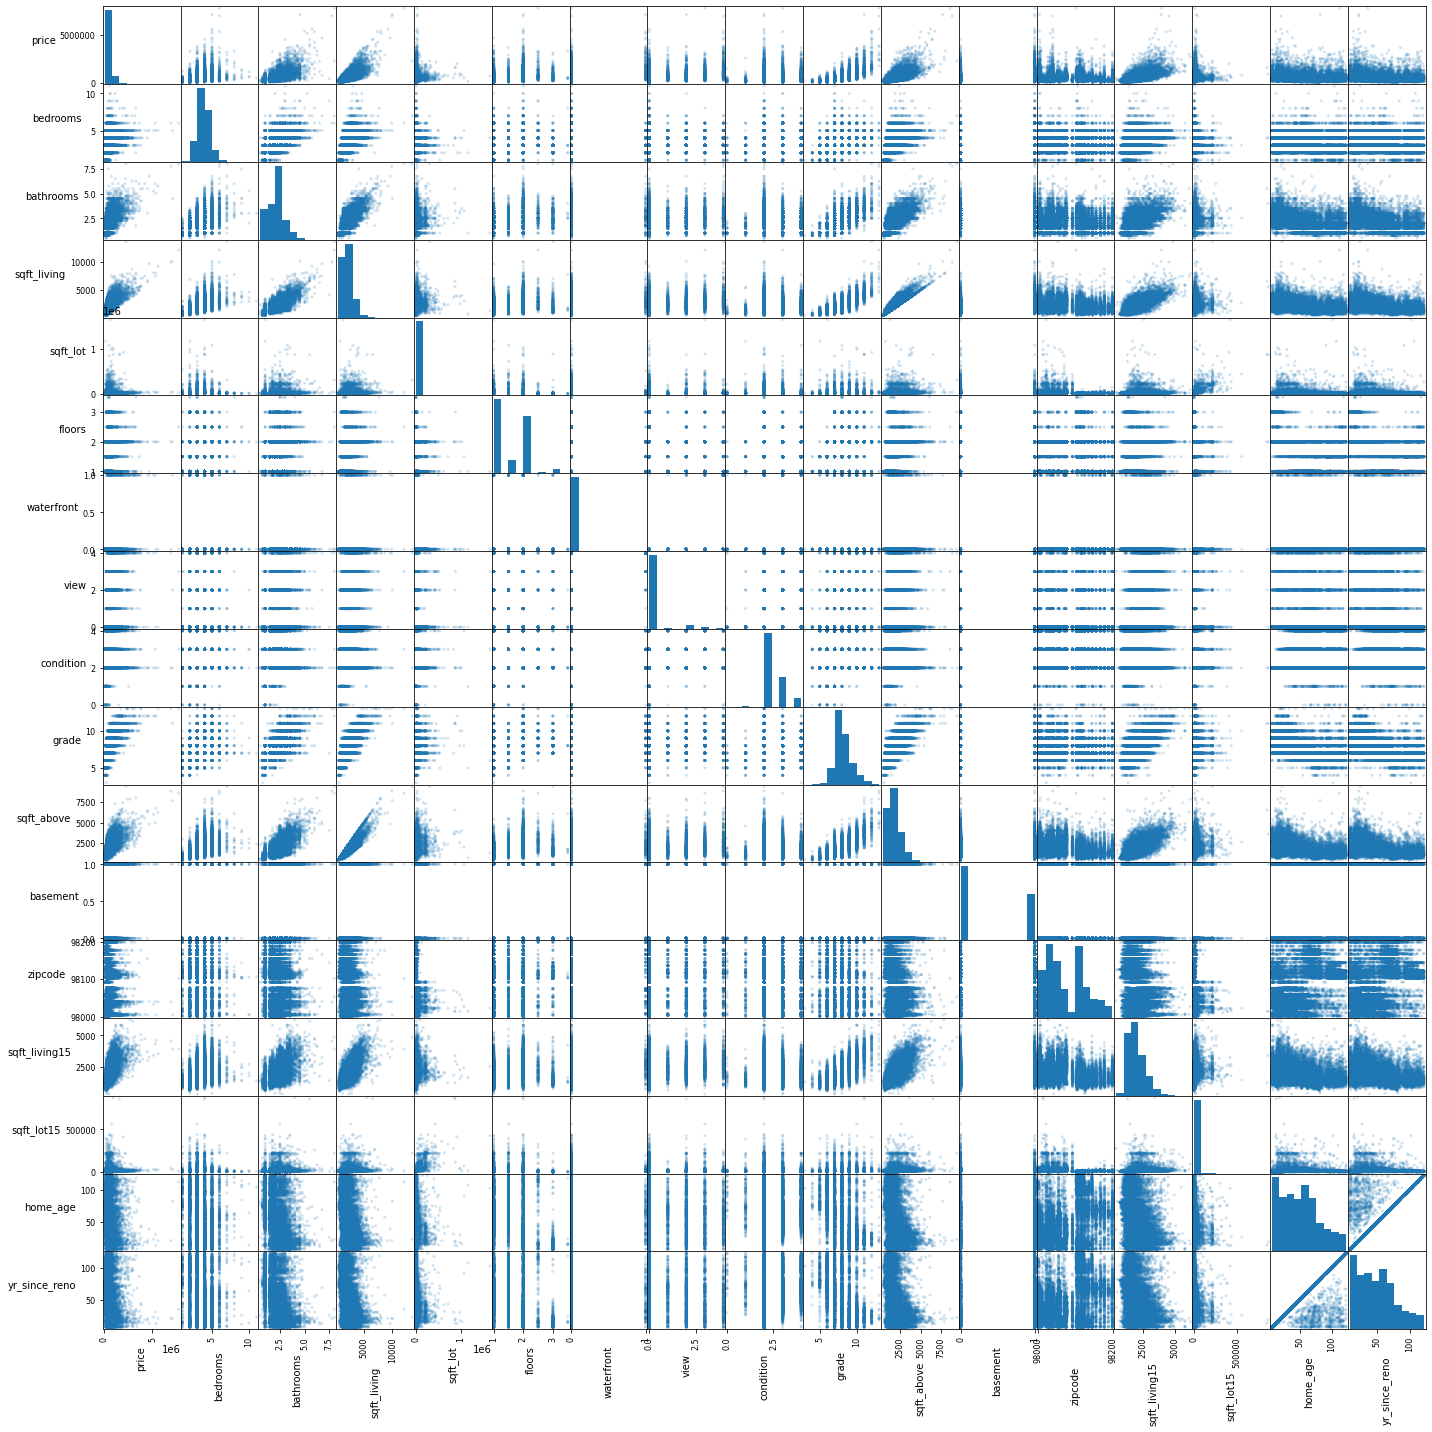

In [16]:
# Visualize the data using scatter plot and histogram

import warnings
warnings.filterwarnings('ignore') # Ignore warnings

# Create scatter matrix
axes = pd.plotting.scatter_matrix(df, alpha = 0.2, figsize  = [20, 20])
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

### Scatter Matrix Results

#### Histogram
The diaganol plots are the histogram and indicate that most of the variables are right-skewed, including the dependent variable, price. 

#### Scatterplot
Looking tat the first row, the variables with the strongest positive coorelation with price are for the number of bathrooms, grade, and square footage of the living space in the house.

### Correlation Matrix Heatmap
A correlation heatmap calculates the Pearson correlation between variables. A Pearson correlation measures the relationship between two variables. A value of 1 means a complete positive correlation, a value of 0 means no correlation, and -1 means a positive correlation. This heatmap has a dark color for negatively correlated variables and a light color for positively correlated variables.

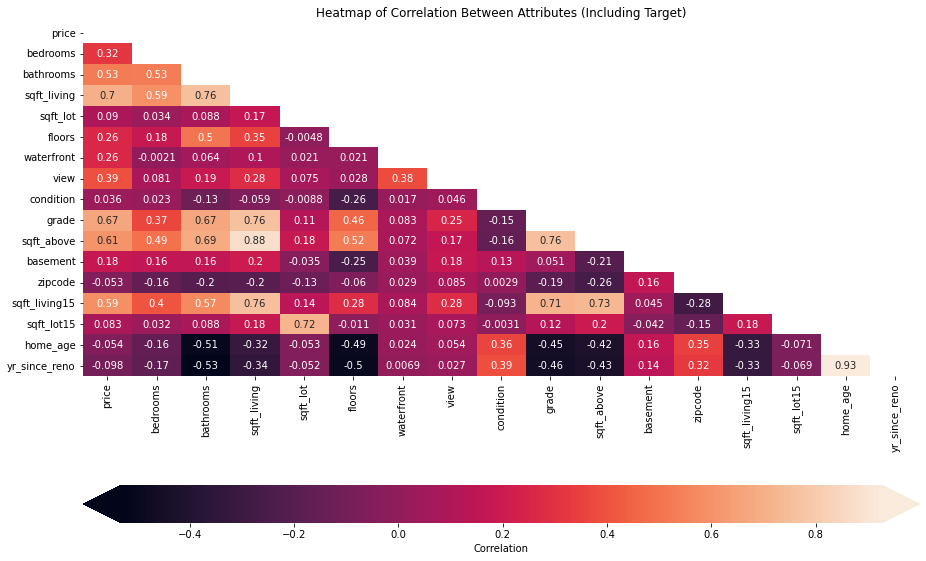

In [17]:
# Make heatmap 
# Code adapted from Flatiron Data Science

# compute the correlation matrix
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

## Dummy variables for ZipCode
Dummy variables or One-hot-encoding is a way to use catagorical variables with regression analysis. The variable `zipcode` is a catagorical variable and must be converted to a numerical data. Each Zipcode will become its own variable and be either a 'no' (0) or 'yes' (1).

In [18]:
# Convert zipcode variable to Dummy variables
df_clean = df.copy()
cat_col = ['zipcode']

# label columns as category
df[cat_col] = df[cat_col].astype('category')
ohe_df = pd.get_dummies(df[cat_col], drop_first=True)

# merge ohe_df with df_clean and drop old zip_code column
df_clean = pd.concat([df_clean, ohe_df], axis=1)
df_clean.drop(cat_col, axis=1, inplace=True)

# Model Specification
In this section I will specify which variable to include in the model to predict sales price. After checking the assumptions and correcting varialbes to fit the assumptions, I will start building the models

|Model|Description|
|:---|:---|
|M1|Use variables highly correlated (>0.6) with sale price|
|M2|A backward stepwise regression to choose variables and find that this procedure chooses almost all independent variables, excluding some the dummy variables for zipcode|
|M3|M1 with interaction effects|

## Model Assumptions ([2](#References))

|Assumption  |Description|
|------------|:-----------|
|1|The regression model is linear in the coefficients and error term|
|2|There is a random sampling of observations |
|3|Error term has a population mean of zero |
|4|There is no multi-collinearity (or perfect collinearity) |
|5|The error term has a constant variance (no heteroskedasticity) |
|6<br>(optional)|The error term is normally distributed. Allows me to perform statistical hypothesis testing. As I am developing a prediciton model this assumption is unnecessary. |

Assumption 2 is met with the collection of the data. The data may lack private sales by owner but the majority of house sales occur through real estate agents. Assumptions 1, 3, 4, 5 and 6 will be checked with residual plots.

## Specifing Model 1 (M1)
I will specify M1 variables using the variables with a Pearson's correlation of 0.6 or greater.

In [19]:
# Features correlated 
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .6 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_with_price = pd.DataFrame({'Correlations':correlations, 'Features': features})

print('Independent Variables Highly Correlated (>0.6) With Price')
display(corr_with_price)

Independent Variables Highly Correlated (>0.6) With Price


,Correlations,Features
0,0.701917,sqft_living
1,0.667951,grade
2,0.605368,sqft_above


### Distribution of dependent variable price

In [20]:
def hist_plot(data, Y):
    '''
    Histogram plot function
    Input:
          data: pandas dataframe
          Y: column of variable for the histogram
    Output:
          Histogram plot
          Skewness and kurtosis value
    Citation:
         Atanu Dan
             https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
'''
    y = data[Y]
    # Plot code
    fig, ax = plt.subplots(1,2, figsize=(15,4))
    sns.distplot(y, fit=norm, bins=30, kde=False, ax=ax[0]);  
    ax[0].title.set_text(f'Histogram of {Y}')
    ax[0].set(xlabel=f'{Y}', ylabel='frequency')
    res = stats.probplot(df_clean['price'], plot=ax[1])

    ## Skewness and Kurtosis
    print(f'EDA of {Y} variable')
    print(f'Skewness: {y.skew()}')
    print(f'Kurtosis: {y.kurt()}')

EDA of price variable
Skewness: 4.023364652271239
Kurtosis: 34.54135857673376


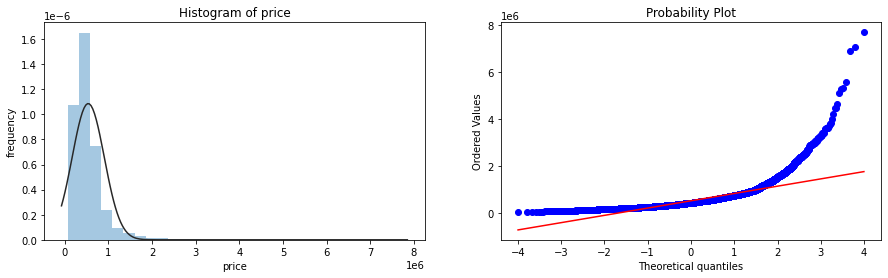

In [21]:
#histogram of price
hist_plot(df_clean, 'price')

#### Interpretation
The data in the variable `price` is highly right-skewed and does not follow a normal distribution as shown in the histogram and QQ-plot. This may result in a high level of **heteroskedasticity** because there are many orders of magnitude between the lowest and highest sale price. Heteroskedasticity results when variance is not equal across the range of dependent variable. This may cause higher variance in high sale price houses in contrast to low sale price houses. In other words, the variance is unequal as it is changing porportionally with the variable.

### Residual plot
A residual plot is produced for the independent variables with the highest correlation to `price`. Residual plots show the residual error plotted against the actual sale price. This will allow me to assess heteroskedasticity as residual plots will have a random pattern around 0 with homoskedasticity but a cone shape pattern with heteroskedasticity.

In [22]:
# Residual plot
def residual_plot(data, X, Y, xlogged=False, ylogged=False):
    '''
    Residual Plot Function
    Input:
          data = Pandas dataframe
          X: independent variable
          Y: dependent variable
          logged: Is the axis logged?
    Output:
          Residual plot
    '''
    x = data[X]
    y = data[Y]
    if xlogged:
        label_x = f'log({X})'
    else:
        label_x = f'{X}'
    if ylogged:
        label_y = f'log({Y})\n$USD'
    else:
        label_y = f'{Y}\n$USD'
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
    ax1.scatter(x, y)
    m, b = np.polyfit(x, y, 1) # regression line
    ax1.plot(x, m*x+b, color='red') # plot regression line
    ax1.set(xlabel=label_x, ylabel=label_y)
    sns.residplot(x=x, y = y, ax=ax2) # residual plot
    ax1.title.set_text(f'Scatterplot: {X} versus {Y}')
    ax2.title.set_text(f'Residual plot: {X} versus {Y}')
    ax2.set(ylabel='residual', xlabel=label_x)
    

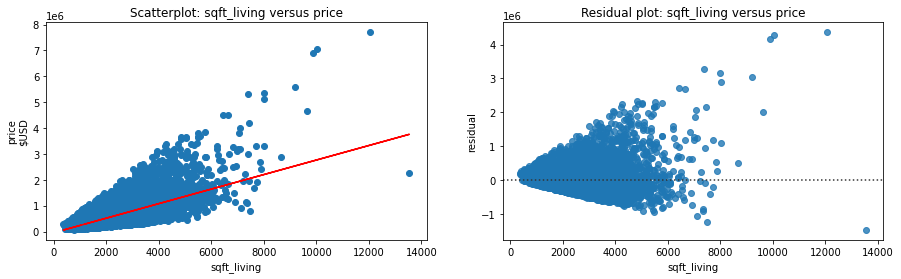

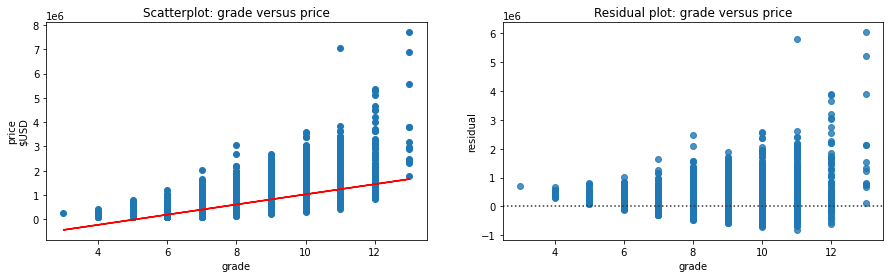

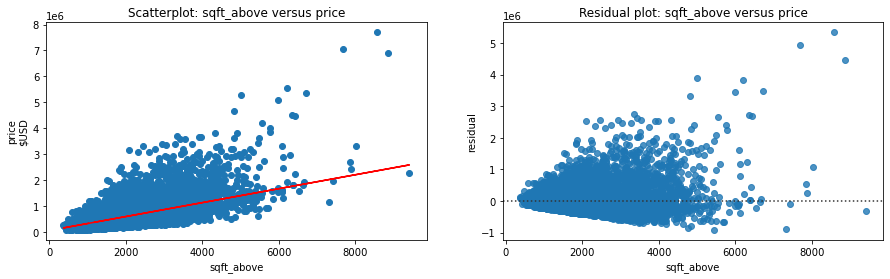

In [23]:
# Residual plot
residual_plot(df_clean, 'sqft_living', 'price', False, False)
residual_plot(df_clean, 'grade', 'price', False, False)
residual_plot(df_clean, 'sqft_above', 'price', False, False)

#### Interpretation
The fitted line plot to the left of the scatterplots for each of these variables indicates that the relationships are not linear. The fan shape in the residual plot indicates that there is a high level of heteroskedasticity which would violate an assumption of ordinary least squares regression. To fix this the `price` variable and variables associated with square feet will be log transformed to take into account the change in magnitude of the variance at higher values.

In [24]:
# log transform price data
df_clean['price'] = np.log(df_clean['price'])

In [25]:
# Log transform the rest of the continuous right-skewed area variables
df_clean['sqft_living'] = np.log(df_clean['sqft_living'])
df_clean['sqft_above'] = np.log(df_clean['sqft_above'])
df_clean['sqft_lot15'] = np.log(df_clean['sqft_lot15'])
df_clean['sqft_lot'] = np.log(df_clean['sqft_lot'])
df_clean['sqft_living15'] = np.log(df_clean['sqft_living15'])

### Histogram of log transformed `price` variable
The distirubtion of the dependent variable, `price`, is not normally distributed after being log transformed.

EDA of price variable
Skewness: 0.4310041773299232
Kurtosis: 0.691048515911131


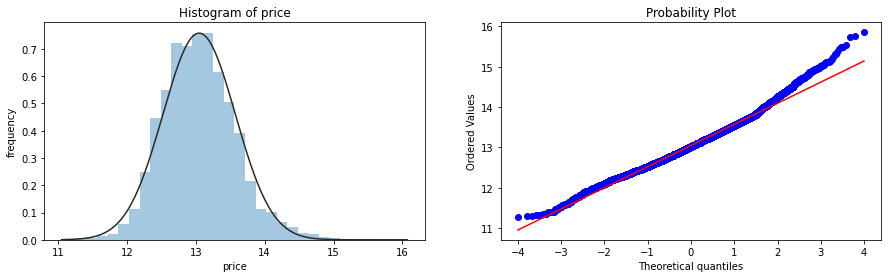

In [26]:
# Histogram of log transformed price independent variable
hist_plot(df_clean, 'price')

### Residual plots with log transformation

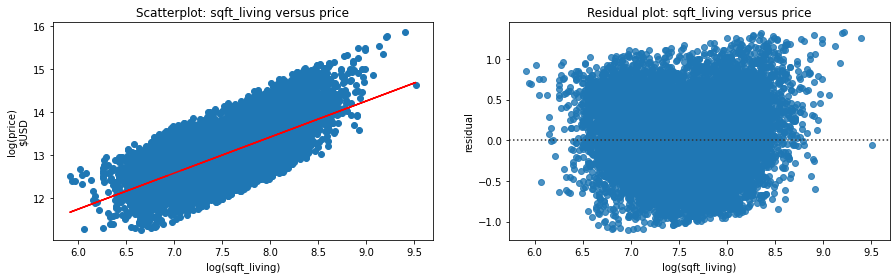

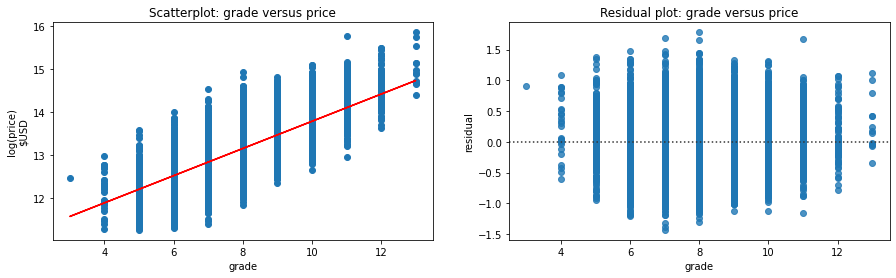

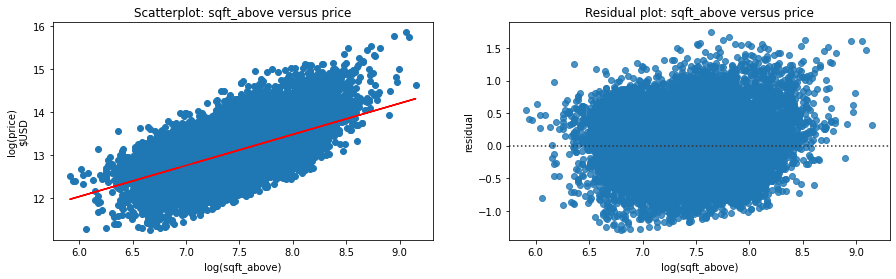

In [27]:
# Residual plot
residual_plot(df_clean, 'sqft_living', 'price', True, True)
residual_plot(df_clean, 'grade', 'price', False, True)
residual_plot(df_clean, 'sqft_above', 'price', True, True)

#### Interpretation
After log transforming the sales price data and the continuous data associated with area, the residual plot has a random pattern which indicates it meets the homoskedasticity assumption for ordinary least square regression. `grade` was not log transformed but the residual plot shows homoskedasticity when `price` is log transformed. `grade` also now appears to have a linear relationship with `price` as shown in the fitted-line plot.

## Model 2 (M2)
Since a simple model like M1 did not produce a high $R^2$ value, M2 uses an automated stepwise backward elemination feature selection strategy. All the variables are fed into the model and fitted. The independent variable with highest p-value is removed if the p-value is greater than 0.05. A p-value greater than 0.05 indicates that variable's effect is not statistically significant. This is repeated until all the p-values of the predictor variables are less than 0.05, meaning they are significant. 

In [28]:
#Backward Elimination function
def backward_elimination(df, y):
    '''
    Backward Elimination
    Feed all the possible features to the model at first. We check 
    the performance of the model and then iteratively remove the worst 
    performing features one by one till the overall performance of the 
    model comes in acceptable range. The performance metric used here to 
    evaluate feature performance is p-value. If the pvalue is above 0.05 
    then we remove the feature, else we keep it.
    
    Input:
          df = Pandas dataframe of your data
          y = dependent variable
    Output:
          list of independent variables in the model

    Citation: 
        Abhini Shetye
            https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
    '''
    X = df.copy()
    X.drop(y.columns, axis=1, inplace=True)
    cols = list(X.columns) # get all of the column names
    pmax = 1
    while (len(cols)>0): # while there are entries in the cols list
        p= [] # initialize p-value list
        X_1 = X[cols] # create new dataframe 
        X_1 = sm.add_constant(X_1) # add constant for y-intercept
        model = sm.OLS(y,X_1).fit() # OLS regression model on the data
        p = pd.Series(model.pvalues.values[1:],index = cols) # save the p-values
        pmax = max(p) # assign maximum p-valuse
        feature_with_p_max = p.idxmax() # get that p-value's index
        if(pmax > 0.05): # check if the max p-value is greater than 5
            cols.remove(feature_with_p_max) # if it is then remove it from the cols list
        else:
            break # otherwise all p-values are less than 0.05
    return cols # return the features

## Model 3 (M3)
Interaction effects occur when the effect of one predictor variable depends on the value of another variable. For example, condition of a home may be dependent on the age of the home. There may be a dependency between the view and the house on waterfront property. M3 builds on M1 by adding interaction effects to the main effects. It also removes `sqft_above` as a predictor variable due to high multicollinearity between `sqft_above` and `sqft_living`.

The graphs below are interaction plots. This plot displays the fitted values of the dependent variable (`price`) on the y-axis and one of the predictor variables on the x-axis. The lines between the points represents the other predictor variable. If the lines remain parallel to each other then there is not an interaction between these variables. If the lines cross that indicates there could be an interaction.

In [29]:
def interaction_analysis(data, var1, var2):
    '''
    Produces an interaction plot with programically determined
    title.
    Input:
         data: Pandas dataframe
         var1: column name of first variable
         var2: column name of second variable
    Output:
         interaction plot with title of var1 and var2
    '''
    # Import library
    from statsmodels.graphics.factorplots import interaction_plot
    
    # Make interaction plot
    fig = interaction_plot(data[var1], df_clean[var2], data['price'])
    plt.title(f'Interaction plot\n {var1} and {var2}') # set title

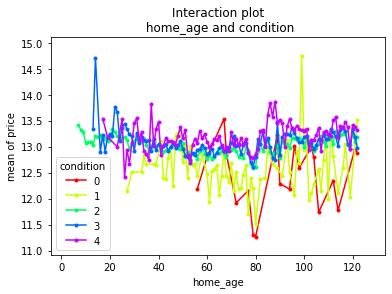

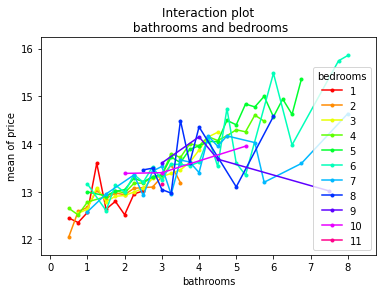

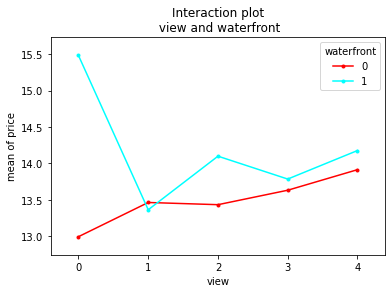

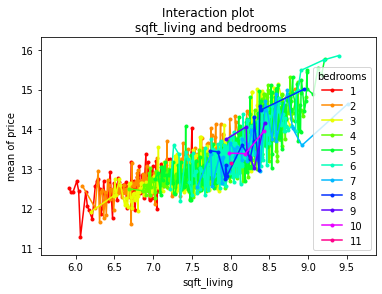

In [30]:
import pandas as pd
from statsmodels.graphics.factorplots import interaction_plot

# Interaction of home age and condition
interaction_analysis(df_clean, 'home_age', 'condition')

# Interaction of bathrooms and bedrooms
interaction_analysis(df_clean, 'bathrooms', 'bedrooms')

# interaction of view and waterfront
interaction_analysis(df_clean, 'view', 'waterfront')

# Interaction of sqft_living and bedrooms
interaction_analysis(df_clean, 'sqft_living', 'bedrooms')

### Interaction Effects Interpretation
On an interaction plot, parallel lines indicate that there is no interaction effect while different slopes and lines that cross suggest that an interaction may be present. 'home_age' and 'condition', 'bathrooms' and 'bedrooms', and 'sqft_living' and 'bedrooms' each show interaction effects. This means a third variable influences the relationship between a dependent and independent variable. The relationship changes depending on the value of the third variable.

'view' and 'waterfront' shows a slight interactive effect but only for view of 1 with no waterfront property. This may because the view variable is measuring the view of the mountains in Washington and not the view of a waterfront property.

# Modeling and Regression Results

## Linear Regression Helper Function

In [31]:
def lin_reg_model(data, features, model_name, formula):  
    '''
    Runs OLS linear regression 
    Input:
        - data: clean data
        - features: independent variables that will be included in model
        - formula: regression formula in R-style
        - model_name: Name you will call the model (ex. Model 1, Model 2)
    Output:
        - OLS summary
        - Residual QQ-plot
        - OLS model object
        - Prediction interval
        - R-squared
        - Root Mean Squared Error
    '''
    target = 'price'
    y = data[target] # outcome data
    X = data[features]
    
    # Linear Regression using statsmodel library
    data = sm.add_constant(data)
    model = sm.OLS.from_formula(formula=formula, data=data).fit()

    # Predict values from the model
    y_predict = model.predict(X)

    # Create K-Fold cross-validation object
    kf = KFold(n_splits=5, shuffle=True) #K-Fold of 5, shuffle data, 20% test data
         
    # Regression model using sklearn
    lm = LinearRegression()
    
    # Cross-validated R-squared calculation
    r2_scores = cross_val_score(lm, X, y, cv=kf, scoring = 'r2')
    r2 = np.mean(np.absolute(r2_scores)) # calculate the mean r-squared
    
    # Calculate prediction interval
    sum_errs = np.sum((y - y_predict) ** 2) # Sum of errors
    stdev = np.sqrt(1/(len(y)-2) * sum_errs) # Standard deviation
    interval = 1.96 * stdev # Prediction interval
    
    # Cross-validated Root Mean Squared Error
    scores = cross_val_score(lm, X, y, cv=kf, scoring = 'neg_mean_squared_error')
    RMSE = np.sqrt(np.mean(np.absolute(scores)))
    
    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    
    # Residual plot
    sns.regplot(x=model.fittedvalues, y=model.resid, ax=ax[0], line_kws={'color':'r'}) # Residual plot of fitted values
    ax[0].title.set_text('Residual plot of fitted values')
    ax[0].set(ylabel='residuals',xlabel='fitted values')
    ax[1].title.set_text('Residual QQ-plot')

    # Plot residual qq-plot
    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=ax[1])
    plt.show() # see https://github.com/statsmodels/statsmodels/issues/5493 for bug
    #fig.suptitle(f'{model_name} Residual QQ plot')
    
    print(model.summary())
    print('\n')
    print(f'R-squared: {r2:.2f}')
    print(f'Prediction Interval: {interval:.2f}')
    print('Root Mean Squared Error:', RMSE)
    
    return model, r2, interval, RMSE

## M1 Results

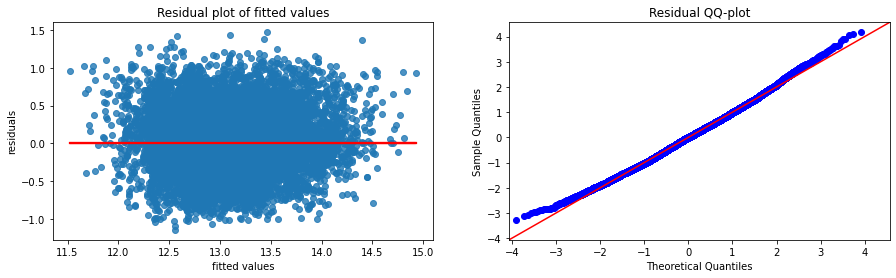

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     8969.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        07:39:24   Log-Likelihood:                -8054.1
No. Observations:               21597   AIC:                         1.612e+04
Df Residuals:                   21593   BIC:                         1.615e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.6531      0.052    167.137      

In [32]:
# Model 1
model_1_features = corr_with_price['Features'].values # Highest correlated features
formula_1 = 'price ~' + '+'.join(model_1_features)

# get regression model results, prediction interval, and RMSE score
model_1_reg, model_1_r2, model_1_pi, m1_RMSE = lin_reg_model(df_clean, model_1_features, 'Model 1', formula_1)

### M1 Interpretation
The p-values indicate that each of the variables chosen has a statistical significant relationship with the dependent variable, but the $R^2$ value is low at 0.55. For a predictive model the $R^2$ needs to be higher. The linear function of M1 is:

$$ 
\hat{y}_{sales\\price} = 0.58X_{sqft\\living} + 0.22X_{grade} - 0.23X_{sqft\\above} + 8.6531 
$$

The coefficient for `sqft_living` is 0.58. This means for every 1% increase in square feet of living space in a house, there is a 0.58% increase in sale price. For every 1% increase in the square feet in the above ground area of a house there is a 0.22% reduction in sale price. Interestingly, the area of the space above the home is penalized. This may be due to multicolinearity between the `sqft_living` and `sqft_above`. For every one-unit increase in the grade of the home, there is a 24.6% increase in sales price. Calculated by, $({e}^{0.22}-1) \times 100$ ([3](#References)).

The residual plot has a random pattern so there is homoskedasticity and the QQ-plot of the residuals indicate that they are normally distributed, meeting the assumptions of OLS.

## Model 2 Results

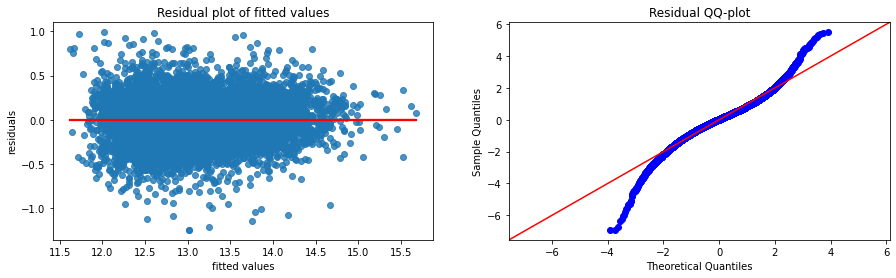

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     2037.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        07:39:27   Log-Likelihood:                 6411.2
No. Observations:               21597   AIC:                        -1.266e+04
Df Residuals:                   21516   BIC:                        -1.201e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.8154      0.047    145.176

In [33]:
model_2_features = backward_elimination(df_clean, df_clean[['price']]) # feature
formula_2 = 'price ~' + '+'.join(model_2_features)

# get regression model results, prediction interval, and RMSE score
model_2_reg, model_2_r2, model_2_pi, m2_RMSE = lin_reg_model(df_clean, model_2_features, 'Model 2', formula_2)

### M2 Interpretation
$R^2$ and adjusted $R^2$ is 0.89 for M2. This is tremendous improvement over M1. There are many more independent variables used in M2 as compared to M1, though. This model used all the independent variables expect for some of the Zipcodes after recoding this variable to dummy variables. Thought there are many variables, the p-values indicate that each of the variables chosen has a statistical significant relationship with the dependent variable. This $R^2$ score is good for a predictive model. 

The coefficient for `condition` for M2 is 0.0527. This means that for ever increase in one-unit of the condition value there is about a 5% increase in the home sale price. Some of the highest coefficients in in the Zipcode variables. For example, with all other independent variables held constant a home in 98039 would sell for 266% more than Zipcode 98003.

The residual plot has a random pattern so there is homoskedasticity. The QQ-plot of the residuals indicate that they are not normally distributed. This could cause problems with the predictive model for predictions of features that are at the extreme ends of the data range compared to the training data, but assumption 6 is only optional and necessary for explorative models and not necessary for predictive models.

## M3 Results

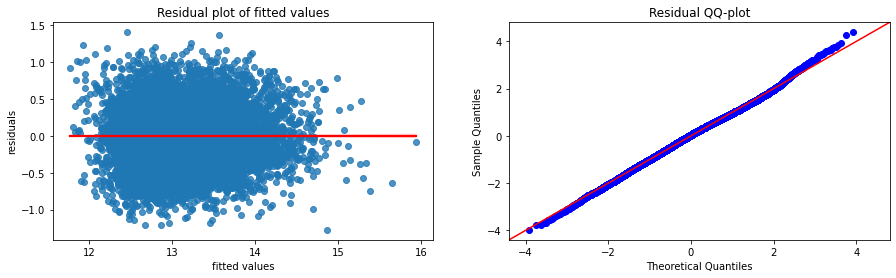

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     5245.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        07:39:29   Log-Likelihood:                -6064.0
No. Observations:               21597   AIC:                         1.214e+04
Df Residuals:                   21589   BIC:                         1.221e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.3395 

In [34]:
model_1_features_del_sqftabove = np.delete(model_1_features, 2)
model_3_features =  np.append(model_1_features_del_sqftabove, ['bedrooms', 'home_age', 'condition'])
formula_3 = 'price ~' + '+'.join(model_3_features) + '+ home_age*condition + sqft_living*bedrooms'
model_3_reg, model_3_r2, model_3_pi, m3_RMSE = lin_reg_model(df_clean, model_3_features, 'Model 3', formula_3)

### M3 Interpretation
When analyzing M3 the p-value of the interaction effect of `bedrooms` with `bathrooms` is greater than 0.05 which indicates it is not a significant effect. While there are interactions between these variables, that interaction does not have a significant effect in this model. The p-values indicate which variables has a statistical significant relationship with the dependent variable. The variables `bedrooms` and `bathrooms` were removed and model 3 was run without them.

$R^2$ and adjusted $R^2$ for M3 is 0.63. This is an improvement over M1 but is less than M2. The interaction effects between some variables does seem to help increase $R^2$.

The residual plot has a random pattern so there is homoskedasticity. The QQ-plot of the residuals indicate that they are normally distributed. These reults show the model meets the assumptions of OLS.

RMSE is similar to M1 (0.352) and higher than M2 (0.180).

# Conclusions

## Model Analysis and Comparisons
I will use coefficient of determination ($R^2$), prediciton intervals, and root means squared error to compare the models and determine which model meets the needs of our client. This includes the most accurate predictive power with a tight range in possibilities.

In [35]:
# Table of model's R-squared, PI, and Cross-validated RMSE
r2 = [model_1_reg.rsquared, model_2_reg.rsquared, model_3_reg.rsquared]
pi = [model_1_pi, model_2_pi, model_3_pi]
rmse = [m1_RMSE, m2_RMSE, m3_RMSE]
results = pd.DataFrame({'R_squared': r2, 
                        'PI': pi,
                        'RMSE': rmse}, 
                       index = ['M1', 'M2', 'M3'])
print('Table 4: Regression Results Table')
results

Table 4: Regression Results Table


,R_squared,PI,RMSE
M1,0.554774,0.688652,0.351411
M2,0.883369,0.352465,0.180683
M3,0.629711,0.628029,0.323584


### Coefficient of Determination ($R^2$)

$R^2$ is a statistical estimate of how close the observed data is to the regression line of each model. It is the porportion of variation in the dependent variable that is predictive from the independent variable. $R^2$ is measured using 5-fold cross-validation.

$$
\begin{equation*}
R^2 = 1 - \frac{\text{Residual Sum of Squares (RSS)}}{\text{Total Sum of Squares (TSS)}}
\end{equation*}
$$

$$
    = 1 - \frac{\sum(y_i - \widehat{y})^2}{\sum(y_i - \bar{y})^2}
$$

As Table 4 above shows, the model with the highest $R^2$ is M2 at 0.88. This is a great score for a predictive model, the higher the better. M1 has the lowest $R^2$ score at 0.55, M2 is highest at 0.88, and M3 is 0.63.

### Prediction Interval
A prediction interval (PI) is the range where a single new observation is likely to fall given specific values of the indpendent variables. The prediciton interval can be use to assess if the predicitons are sufficiently in a narrow range to satisfy the client's requirement. Prediction intervals can be compared across models. Smaller intervals indicate tighter predictive range. Large prediction intervals tell us the model could have a wide range in its predictions and would not meet the client's needs.

The prediction interval is calculated by,

$$ PI = 1.96 \times s, \\ \text{ where s is the sample standard deviation calculated by} $$

$$ s = \sqrt{\frac{1}{N-2} \times RSS}$$

M2 also has the lowest predictive intervals. A prediction interval is the range where a single new observation is likely (95%) to fall given specific values of the indpendent variables. The smaller the predictive interval the more confidence the true sale price is in that region. M1 and M2 had resonably similar prediction intervals and twice the value as M2.

### Root Mean Squared Error
RMSE is a measure of the mean error rate of a regression model that penalizes larger errors. It is the square root of the average squared difference between the predicted dependent value and the actual values in the dataset. The smaller the RMSE value, the closer the fitted line from the linear equation is to the actual data. Like Mean Squared Error (MSE), this statistic squares the residual error before it is averaged, which gives a high weight to large errors, but because it the square root is taken, the statistic is in the same units as the dependent variable, sale price (\$USD). The lower the score of RMSE the closer the model fits the data. 

$$RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2},\\
\text{where } (\hat{y_1}, \hat{y_2}, …, \hat{y_n}) \text{ are the predicted values,} \\ (y_1, y_2, …, y_n) \text{ are the observed values} \\ \text{and } (n) \text{is the number of observations}$$

RMSE is estimated using K-Fold cross validation. M2 is almost half the RMSE score of M1 and M2 indicating it produces less error between the actual and predicted values. 

## Prediction Application

The prediction of Model 2 seems the most reliable of the three models. Below is the `price_predictor` function that input as one of the three models, the new home features, and the prediction interval.

In [36]:
def price_predictor(model_no, new_data, pi):
    '''
    This function takes in a model and Pandas series object and returns
    an estimated price range for the house to be listed.
    
    Model 1: price ~ ln(sqft_living) + ln(sqft_above) + grade
    
    Model 2: price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+
                     view+condition+grade+sqft_above+basement+sqft_living15+sqft_lot15+
                     home_age+yr_since_reno+zipcode
                    
    Model 3: price ~ sqft_living+grade+sqft_above+ home_age*condition + sqft_living*bedrooms
    
    Input:
          model_no: Statsmodel linear regression model results
          new_data: Pandas Series with variables needed for the regression model
          pi: prediction interval for that model
    Output:
          Predicted sale price
          Predicted sale price range
    '''     
    price_ln = model_no.predict(new_data).values[0]
    price = round(np.exp(price_ln))
    price_low = round(np.exp(price_ln - pi))
    price_up = round(np.exp(price_ln + pi))
    
    return f'Predicted price: {price}, range: {price_low} - {price_up}'

### Demonstration

In [37]:
#data = df_clean.iloc[8677]

In [38]:
data = df_clean.sample().squeeze() # Randomly sample data for prediction

In [39]:
# Model 1 prediction
data_new = data.drop('price') # Remove actual price
print(price_predictor(model_1_reg, data_new, model_1_pi)) # Run prediciton function
sale_price = round(np.exp(data['price'])) # assign actual sale price
print(f'Actual sale price: {sale_price}') # print out actual sale price

Predicted price: 338530, range: 170028 - 674024
Actual sale price: 369000


In [40]:
# Model 2 Prediction function
print(price_predictor(model_2_reg, data_new, model_2_pi))
print(f'Actual sale price: {sale_price}')

Predicted price: 328555, range: 230958 - 467392
Actual sale price: 369000


In [41]:
# Model 3 prediction function
print(price_predictor(model_3_reg, data_new, model_3_pi))
print(f'Actual sale price: {sale_price}')

Predicted price: 302181, range: 161257 - 566262
Actual sale price: 369000


# Recommendations

## Summary
- Our client wants to be able to predict sales price.
- Ordinary least squares linear regression was used to create three models.
- The three models were compared using $R^2$, Prediction Intervals (PI), and Root Mean Squared Error (RMSE).
- Model 2 (M2) is the best model as it has the best predictive capabilities, R-squared 0.88, low RMSE and PI.
- M2 could be used to prototype a client dashboard for real estate agents to predict sales price for new data.
- More data and variables should be collected to improve the model's predictive power.
- Communicate with client about internal real estate data that can be used to further train the model.

## Actionable Recommendations
1. M2 could be used for a client dashboard prototype for Bon Jovi real estate agents to predict sales price.
2. M2 can be used to measure the cost-benefit analysis of making improvements to the home. For example, a one-unit increase in the condition of the home will increase the sale price by about 5%. 
3. M2 can help Bon Jovi real estate agents locate customers and properties that have the highest sale price potential. For example, homes in Zipcode 98039 sold for over 200% more than homes in Zipcode 98003 so those customers in 98039 likely have a higher sales price.

## Next Steps
This model could be improved to make better predictions by adding more data additional features, such as crime rate in the geographic location of the home, the zoned public school ranking, and time the house was on the market until it was sold. The GPS coordinates of the sold house could be used to collect the first two of these variables. The Multiple Listing Service may be a source for more recent data and on how long a house was on the market from day of listing to closing date. 

Another source of data could be in the internal data of our brokerage client. They possibly have data of properties they have sold or bid on, this would include the data of the asking and bidding price of the property.

# References
1. Kaggle, [Kaggle, House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

2. Albert, [Key Assumptions of OLS: Econometrics Review](https://www.albert.io/blog/key-assumptions-of-ols-econometrics-review/)

3. University of Virginia, [Interpreting Log Transformations in a Linear Model](https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/)